In [ ]:
# Mount file to google drive
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit  # Use ! for shell commands outside of Jupyter, or install beforehand
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import shapiro, levene

In [ ]:
# Load the dataframe
df=pd.read_excel('/drive/My Drive/Colab Notebooks/INF2178_A2_data (1).xlsx')
print(df.head())

   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School        0   
2  Catholic

In [ ]:
# Checking dataset for nan values
df.isna().sum()

_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

In [ ]:
# Normality check for Auspice
for auspice in df['AUSPICE'].unique():
    stat, p = shapiro(df[df['AUSPICE'] == auspice]['TOTSPACE'])
    print(f"Normality test for {auspice} group: Statistics={stat}, p={p}")

Normality test for Non Profit Agency group: Statistics=0.8917579650878906, p=8.339870811481173e-22
Normality test for Commercial Agency group: Statistics=0.9238301515579224, p=1.013540900512977e-11
Normality test for Public (City Operated) Agency group: Statistics=0.9514912962913513, p=0.09225869178771973


In [ ]:
# Normality check for subsidy available group
stat, p = shapiro(df[df['subsidy'] == 'Y']['TOTSPACE'])
print(f"Normality test for Subsidy Available: Statistics={stat}, p={p}")

# Normality check for subsidy not available group
stat, p = shapiro(df[df['subsidy'] == 'N']['TOTSPACE'])
print(f"Normality test for Subsidy Not Available: Statistics={stat}, p={p}")

Normality test for Subsidy Available: Statistics=0.885027289390564, p=1.1605755716402631e-22
Normality test for Subsidy Not Available: Statistics=0.9075363278388977, p=1.094311341304395e-13


In [ ]:
# Homogeneity of variance check for Auspice
groups = [group['TOTSPACE'].values for name, group in df.groupby('AUSPICE')]
stat, p = levene(*groups)
print(f"Levene’s test: Statistics={stat}, p={p}")

Levene’s test: Statistics=17.927068524236084, p=2.2036889276494363e-08


In [ ]:
# Homogeneity of variance check for Subsidy
stat, p = levene(df[df['subsidy'] == 'Y']['TOTSPACE'], df[df['subsidy'] == 'N']['TOTSPACE'])
print(f"Levene's test: Statistics={stat}, p={p}")

Levene's test: Statistics=22.988879302520136, p=1.8617545516099655e-06


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


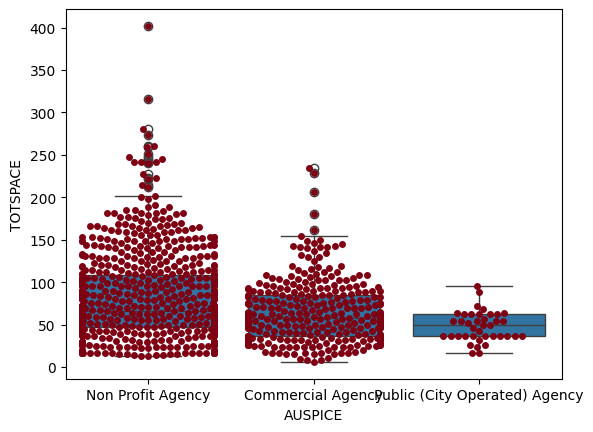

In [ ]:
# Visualize the distribution of total spaces (TOTSPACE) across different auspices (AUSPICE)
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df)
sns.swarmplot(x="AUSPICE", y="TOTSPACE", data=df, color='#7d0013')
plt.show()

In [ ]:
# Create the OLS model: 'TOTSPACE' as a function of 'subsidy
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()

# Conducting the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


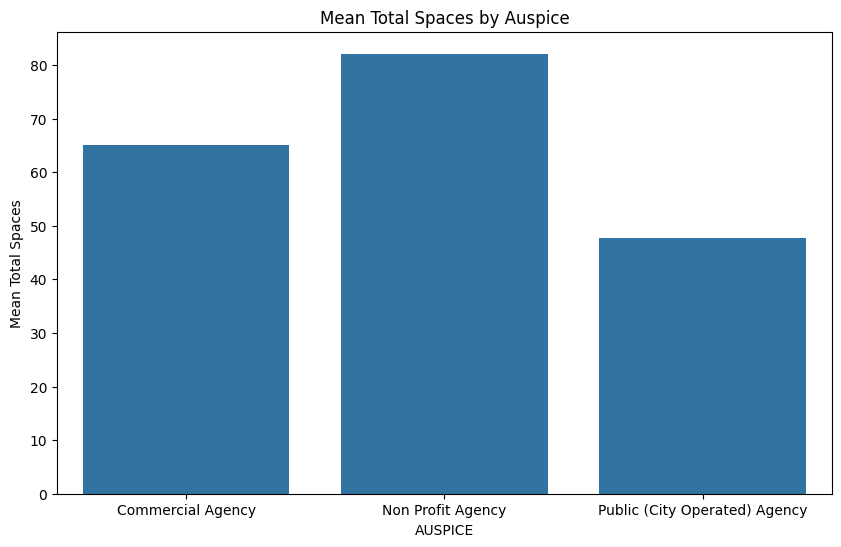

In [ ]:
# Mean total spaces by auspice
mean_totspace_by_auspice = df.groupby('AUSPICE')['TOTSPACE'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='AUSPICE', y='TOTSPACE', data=mean_totspace_by_auspice)
plt.title('Mean Total Spaces by Auspice')
plt.ylabel('Mean Total Spaces')
plt.show()


In [ ]:
# Melting the DataFrame
df_melt = pd.melt(df, id_vars=['AUSPICE', 'subsidy'], value_vars=['TOTSPACE'], var_name='Variable', value_name='Value')

# Display the first few rows of the melted DataFrame
print(df_melt.head())

             AUSPICE subsidy  Variable  Value
0  Non Profit Agency       Y  TOTSPACE    164
1  Non Profit Agency       Y  TOTSPACE     83
2  Non Profit Agency       Y  TOTSPACE    102
3  Non Profit Agency       Y  TOTSPACE     65
4  Non Profit Agency       Y  TOTSPACE     26


In [ ]:
# Fitting the model with interaction between AUSPICE and subsidy
model = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=df).fit()

# Performing two-way ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

                             sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN


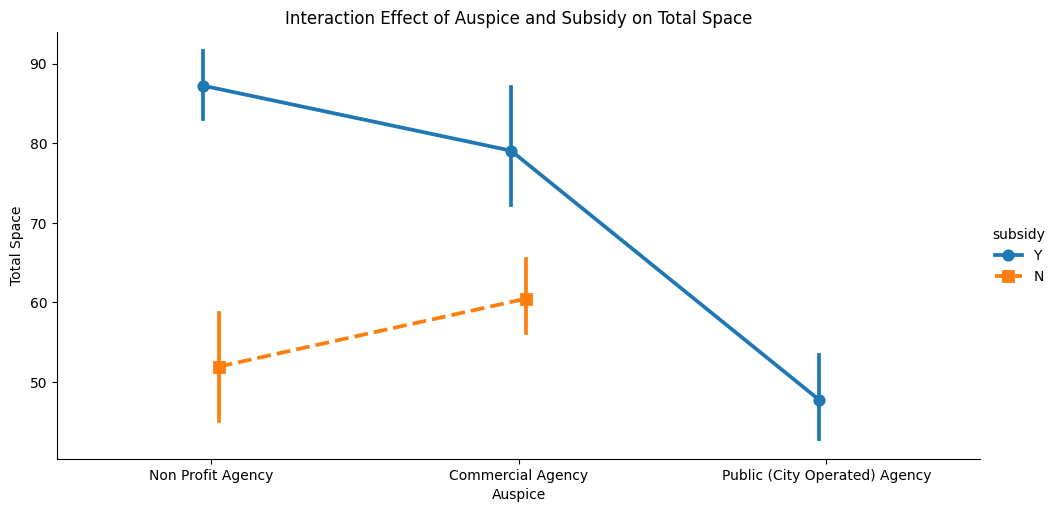

In [ ]:
# Creating cat plot for the interaction effect
sns.catplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', kind='point', data=df, aspect=2, height=5, dodge=True, markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction Effect of Auspice and Subsidy on Total Space')
plt.xlabel('Auspice')
plt.ylabel('Total Space')
plt.show()

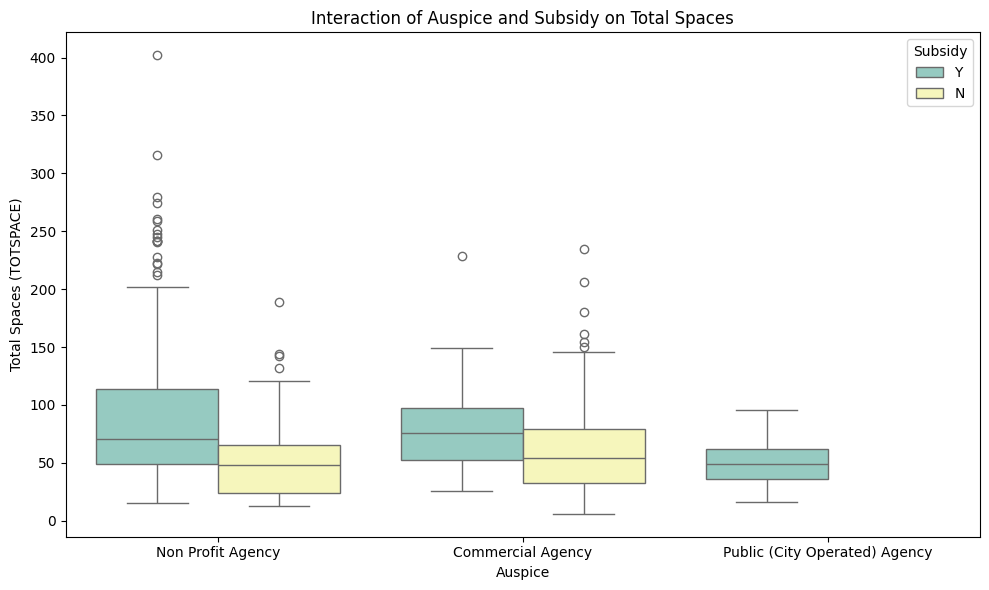

In [ ]:
# Creating a boxplot for the interaction effect
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, palette="Set3")
plt.title('Interaction of Auspice and Subsidy on Total Spaces')
plt.xlabel('Auspice')
plt.ylabel('Total Spaces (TOTSPACE)')
plt.legend(title='Subsidy')
plt.tight_layout()
plt.show()

<ipython-input-37-470a91b2750b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, ci='sd')


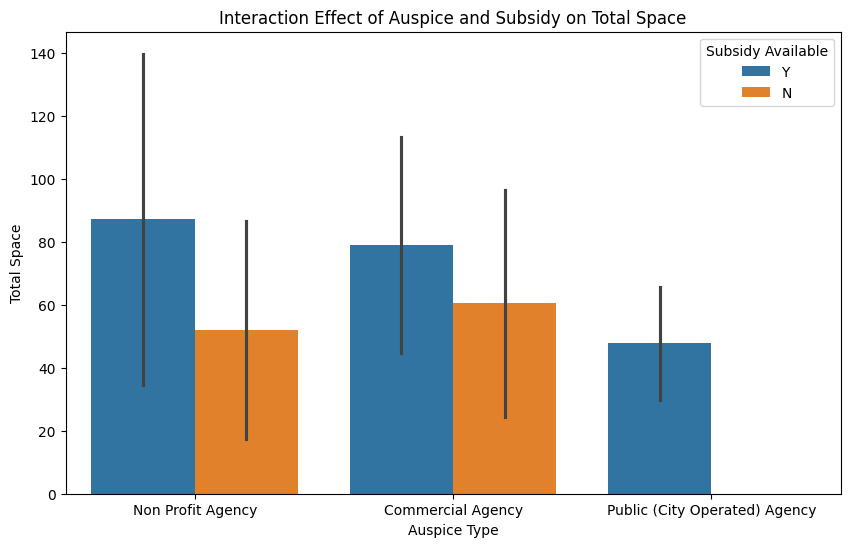

In [ ]:
# Visualize the mean 'TOTSPACE' for each 'AUSPICE' category, separated by 'subsidy' status.
plt.figure(figsize=(10, 6))
sns.barplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', data=df, ci='sd')
plt.title('Interaction Effect of Auspice and Subsidy on Total Space')
plt.xlabel('Auspice Type')
plt.ylabel('Total Space')
plt.legend(title='Subsidy Available')
plt.show()

In [ ]:
# Conduct post-hoc analysis for significant ANOVA findings
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var=['AUSPICE', 'subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(res.tukey_summary)

                                group1                              group2  \
0               (Non Profit Agency, Y)              (Non Profit Agency, N)   
1               (Non Profit Agency, Y)              (Commercial Agency, Y)   
2               (Non Profit Agency, Y)              (Commercial Agency, N)   
3               (Non Profit Agency, Y)  (Public (City Operated) Agency, Y)   
4               (Non Profit Agency, Y)  (Public (City Operated) Agency, N)   
5               (Non Profit Agency, N)              (Commercial Agency, Y)   
6               (Non Profit Agency, N)              (Commercial Agency, N)   
7               (Non Profit Agency, N)  (Public (City Operated) Agency, Y)   
8               (Non Profit Agency, N)  (Public (City Operated) Agency, N)   
9               (Commercial Agency, Y)              (Commercial Agency, N)   
10              (Commercial Agency, Y)  (Public (City Operated) Agency, Y)   
11              (Commercial Agency, Y)  (Public (City Operated) 

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

In [ ]:
# Normality check of residuals
residuals = model.resid
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk Test: stat={stat}, p={p}')

Shapiro-Wilk Test: stat=0.9018619656562805, p=1.5311055543621852e-25
